In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install apyori

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from apyori import apriori
# from skimage.io import imread
# from skimage.transform import resize
from time import time


In [5]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
df = pd.read_csv('Trade_Data_Normalization_v8.csv', sep=',') 
df.head(10)

,0,1,2,3,4,5,6
0,LINEAR IC,LOGIC IC,MEMORY_EMBEDED,NaN,NaN,NaN,NaN
1,CPU / MPU,DISCRETE,LINEAR IC,PEMCO,NaN,NaN,NaN
2,CHIPSET / ASP,CPU / MPU,LINEAR IC,NaN,NaN,NaN,NaN
3,DISCRETE,LINEAR IC,OPTICAL AND SENSOR,NaN,NaN,NaN,NaN
4,CHIPSET / ASP,DISCRETE,LINEAR IC,MEMORY_SYSTEM,NaN,NaN,NaN
5,CPU / MPU,LOGIC IC,MEMORY_EMBEDED,NaN,NaN,NaN,NaN
6,OTHERS,PEMCO,NaN,NaN,NaN,NaN,NaN
7,DISCRETE,MEMORY_SYSTEM,NaN,NaN,NaN,NaN,NaN
8,PEMCO,NaN,NaN,NaN,NaN,NaN,NaN
9,LINEAR IC,MEMORY_EMBEDED,OTHERS,NaN,NaN,NaN,NaN


In [6]:
items = set()
for col in df:
    items.update(df[col].unique())
print(items)


{nan, 'OPTICAL AND SENSOR', 'LINEAR IC', 'MEMORY_EMBEDED', 'CHIPSET / ASP', 'MEMORY_SYSTEM', 'CPU / MPU', 'PEMCO', 'LOGIC IC', 'OTHERS', 'DISCRETE'}


In [7]:
itemset = set(items)
encoded_vals = []
for index, row in df.iterrows():
    rowset = set(row) 
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
ohe_df = pd.DataFrame(encoded_vals)

In [8]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
x=[]
y=[]
z=[]
st=[]
setItem=[]
import time
for xA in range(1,10):
    for xB in range(1,10):
        timeStart=time.time()
        freq_items = apriori(ohe_df, min_support=xA/10, use_colnames=True, verbose=1,low_memory=False)
        rules = association_rules(freq_items, metric="confidence", min_threshold=xB/10)
        timeFinish=time.time()
        for r in range(0,int(rules.support.size)):
            items=[list(rules.antecedents[r]),list(rules.consequents[r]),rules.support[r],rules.confidence[r],rules.lift[r]]
            setItem.append(items)
support= input("請輸入支持度:")

confidence= input("請輸入信心度:")

item= input("請輸入商品類型(PRODUCT_TYPE，若有多項請以「,」分開):")

RProductList=[]
RProduct=""
inputItem=item.split(',')
inputItemNum=len(inputItem)
inputChkNum=0
for r in setItem:
    if(r[2]>=float(support) and r[3]>=float(confidence)):
        for i in r[0]:
            for ii in inputItem:
                if(i==ii):
                    inputChkNum=inputChkNum+1
                    if(inputItemNum==inputChkNum):
                        break
            if(inputItemNum==inputChkNum):
                RProductList.append(r[1])
                break
        
print("您輸入的支持度為:"+support)
print("您輸入的信心度為:"+confidence)
print("您輸入的商品類型為:"+item)
print("==============================")
print("為您推薦以下商品類型:")
rItem=[]
for r in RProductList:
    for c in r:
        if(c is not np.nan):
            isSave=False
            for i in rItem:
                if(i==c):
                    isSave=True
                    break
            if(isSave==False):
                rItem.append(c)
itemsSetList=[]
for r in rItem:
    isSave=False
    for i in inputItem:
        if(r==i):
            isSave=True
    if(isSave==False):
        itemsSetList.append(r)
print(itemsSetList)

Processing 5 combinations | Sampling itemset size 5 4
Processing 5 combinations | Sampling itemset size 5 4
Processing 5 combinations | Sampling itemset size 5 4
Processing 5 combinations | Sampling itemset size 5 4
Processing 5 combinations | Sampling itemset size 5 4
Processing 5 combinations | Sampling itemset size 5 4
Processing 5 combinations | Sampling itemset size 5 4
Processing 5 combinations | Sampling itemset size 5 4
Processing 5 combinations | Sampling itemset size 5 4
Processing 4 combinations | Sampling itemset size 43
Processing 4 combinations | Sampling itemset size 43
Processing 4 combinations | Sampling itemset size 43
Processing 4 combinations | Sampling itemset size 43
Processing 4 combinations | Sampling itemset size 43
Processing 4 combinations | Sampling itemset size 43
Processing 4 combinations | Sampling itemset size 43
Processing 90 combinations | Sampling itemset size 2

C:\Users\Cheng Gang Wong\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\Cheng Gang Wong\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\Cheng Gang Wong\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\Cheng Gang Wong\AppData\Roaming\Python\Python3

Processing 4 combinations | Sampling itemset size 43
Processing 4 combinations | Sampling itemset size 43
Processing 33 combinations | Sampling itemset size 3
Processing 33 combinations | Sampling itemset size 3
Processing 33 combinations | Sampling itemset size 3
Processing 33 combinations | Sampling itemset size 3
Processing 33 combinations | Sampling itemset size 3
Processing 33 combinations | Sampling itemset size 3
Processing 33 combinations | Sampling itemset size 3
Processing 33 combinations | Sampling itemset size 3
Processing 33 combinations | Sampling itemset size 3
Processing 9 combinations | Sampling itemset size 32
Processing 9 combinations | Sampling itemset size 32
Processing 9 combinations | Sampling itemset size 32
Processing 9 combinations | Sampling itemset size 32
Processing 9 combinations | Sampling itemset size 32
Processing 9 combinations | Sampling itemset size 32
Processing 9 combinations | Sampling itemset size 32
Processing 9 combinations | Sampling itemset s

C:\Users\Cheng Gang Wong\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\Cheng Gang Wong\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\Cheng Gang Wong\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\Cheng Gang Wong\AppData\Roaming\Python\Python3

您輸入的支持度為:0.1
您輸入的信心度為:0.1
您輸入的商品類型為:DISCRETE
為您推薦以下商品類型:
['OPTICAL AND SENSOR', 'LINEAR IC', 'LOGIC IC', 'MEMORY_SYSTEM', 'CHIPSET / ASP']


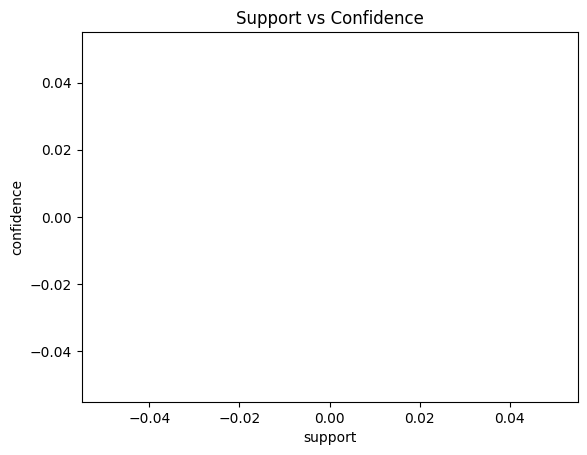

In [9]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

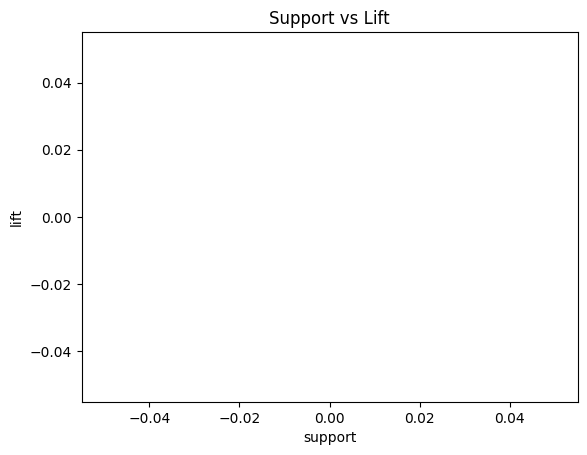

In [10]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

In [11]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Lift vs Confidence')

TypeError: expected non-empty vector for x